Dataset source : kaggle

Variables:

1. MarketID: unique identifier for market (1 – 10).
2. MarketSize: size of market area by sales (Small, Medium, Large).
3. LocationID: unique identifier for store location.
4. AgeOfStore: age of store in years (1 – 28).
5. Promotion: one of three promotions that was tested (1, 2, 3).
6. week: one of four weeks when the promotions were run (1 – 4).
7. SalesInThousands: sales amount for a specific LocationID, Promotion and week.

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use('ggplot')

In [215]:
data = pd.read_csv('Marketing-Campaign.csv')
data.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


# DEscriptive Analytics
## which campaign was most succesful in terms of sales figures total

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [201]:
data.isna().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

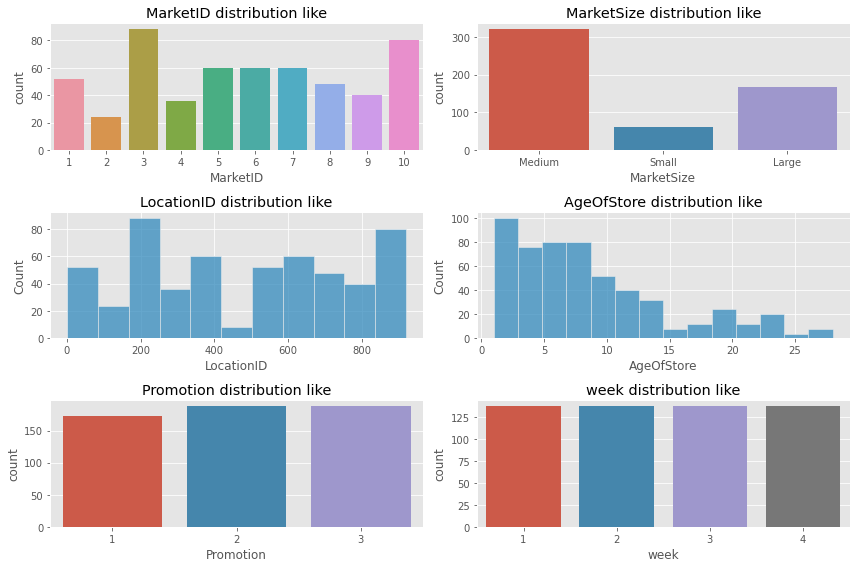

In [216]:
#to plot features distribution
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3,2,i+1)
    if data[col].nunique() > 10:
        sns.histplot(data[col])
    else:
        sns.countplot(x=col, data=data)
        plt.tight_layout()
    plt.title('{} distribution like'.format(col))

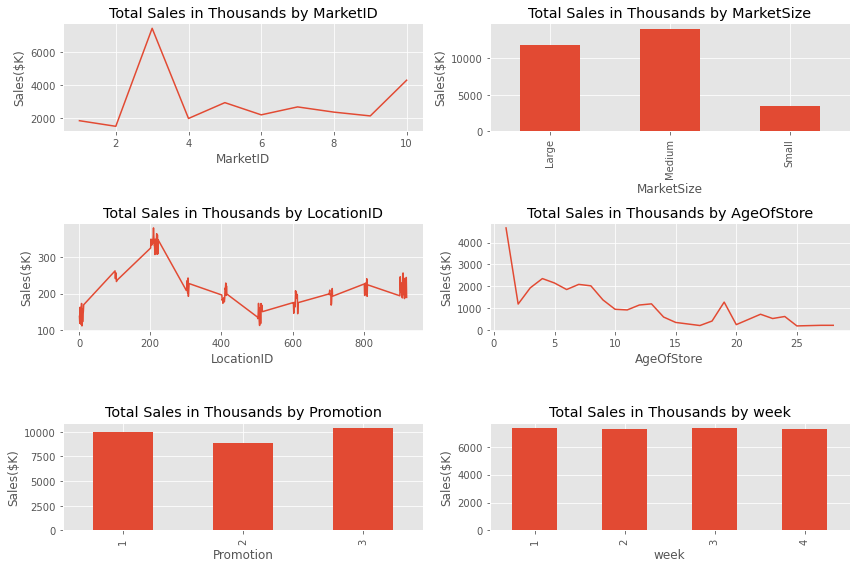

In [219]:
#sales values dataset for each feature
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3,2,i+1)
    if data[col].nunique() < 10:
        data.groupby(col)['SalesInThousands'].sum().plot(kind='bar')
    else:
        data.groupby(col)['SalesInThousands'].sum().plot(kind='line')
    plt.ylabel('Sales($K)')
    plt.title('Total Sales in Thousands by {}'.format(col))
    plt.tight_layout()

Promotion         1        2        3
MarketSize                           
Large       4213.21  3860.61  3705.79
Medium      4576.57  4224.35  5274.39
Small       1203.25   812.97  1428.34


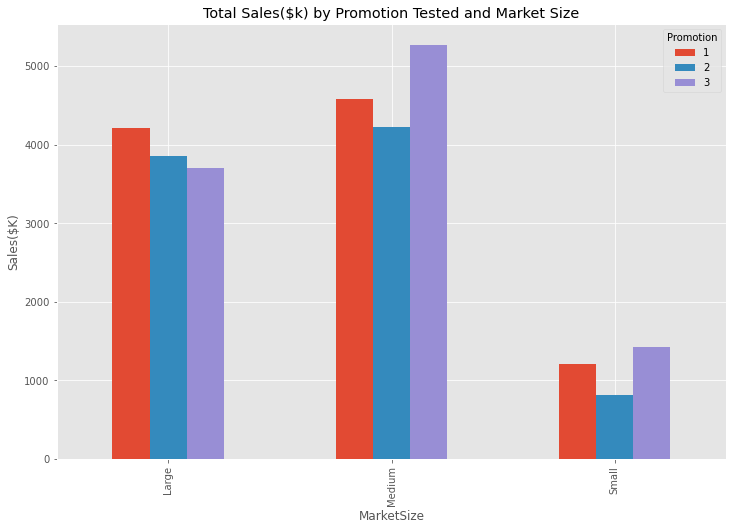

In [231]:
#average number of sales (in thousands) for every market size
marketsize = data.groupby(['Promotion','MarketSize'])['SalesInThousands'].sum().unstack('Promotion')
print(marketsize)
marketsize.plot(kind='bar')
plt.ylabel('Sales($K)')
plt.title('Total Sales($k) by Promotion Tested and Market Size')
plt.show()

# Hypothesis Test
## which campaign was most successful?? Any significance differences in Sales Amount by MarketSize & Promotion

1. formulate hypothesis

   a. null hypothesis: 
    - average sales group A = average sales group B 
    
   b. alternative hyposthesis
    - average sales group A != average sales group B 

2. calculate the t-statistic & p-value

3. cutoff value for the t-stat
    - alpha/significance level = 0.05 (95% Confidence Interval as per industry guidelines)

In [204]:
means = data.groupby('MarketSize')['SalesInThousands'].mean()
means

MarketSize
Large     70.116726
Medium    43.985344
Small     57.409333
Name: SalesInThousands, dtype: float64

In [205]:
from scipy import stats

In [206]:
small = data[data['MarketSize']=='Small']['SalesInThousands']
medium = data[data['MarketSize']=='Medium']['SalesInThousands']
large = data[data['MarketSize']=='Large']['SalesInThousands']

In [213]:
from itertools import combinations
comb1, comb2, comb3 = combinations(['small','medium','large'],2)
comb1, comb2, comb3

(('small', 'medium'), ('small', 'large'), ('medium', 'large'))

In [218]:
def t_test(a,b):
    alpha = 0.05
    t_stat, p_value = stats.ttest_ind(a,b, equal_var=False)
    if p_value > 0.05:
        print('p_value is greater than 0.05')
        print('do not have sufficient evidence to reject the null hypothesis of the test')
    else:
        print('there is different between 2 samples mean provided')
    print('p-value: ',round(p_value,10))
    print('t-stat:', round(t_stat))

print('Market Size {}'.format(comb1))
t_test(small,medium)
print()
print('Market Size {}'.format(comb2))
t_test(small,large)
print()
print('Market Size {}'.format(comb3))
t_test(medium,large)
'''From the p-value we can say that all the three market sizes were having different average sales values'''

Market Size ('small', 'medium')
there is different between 2 samples mean provided
p-value:  0.0
t-stat: 13

Market Size ('small', 'large')
there is different between 2 samples mean provided
p-value:  0.0
t-stat: -8

Market Size ('medium', 'large')
there is different between 2 samples mean provided
p-value:  0.0
t-stat: -19


'From the p-value we can say that all the three market sizes were having different average sales values'

In [178]:
#verify any differences in mean for promotion 1,2 and 3
promotion1 = data[data['Promotion']==1]['SalesInThousands']
promotion2 = data[data['Promotion']==2]['SalesInThousands']
promotion3 = data[data['Promotion']==3]['SalesInThousands']

In [211]:
comb1, comb2, comb3 = combinations(['promotion1','promotion2','promotion3'],2)
print(comb1)
t_test(promotion1, promotion2)
print()
print(comb2)
t_test(promotion1, promotion3)
print()
print(comb3)
t_test(promotion2, promotion3)

'''we can see from the p-value, the average sales values in promotion 1 and 3 do not differ significantly. But the difference between promotion 1 and 2 does as well as promotion 2 vs. 3.'''

('promotion1', 'promotion2')
there is different between 2 samples mean provided
p-value:  4e-10

('promotion1', 'promotion3')
p_value is greater than 0.05
do not have sufficient evidence to reject the null hypothesis of the test
p-value:  0.1205914774

('promotion2', 'promotion3')
there is different between 2 samples mean provided
p-value:  1.5693e-06


'we can see from the p-value, the average sales values in promotion 1 and 3 do not differ significantly. But the difference between promotion 1 and 2 does as well as promotion 2 vs. 3.'